## Installation Required Libraries

In [1]:
# ! pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

In [2]:
# !sudo apt-get update

In [3]:
# !sudo apt-get install poppler-utils

In [4]:
# !sudo apt-get install tesseract-ocr

In [5]:
# !sudo apt-get install libtesseract-dev

In [6]:
# !pip install unstructured-pytesseract

## Data Parsing (Extraction)

In [17]:
# Before running next cell provide HF (Hugging face) token colab keys.

In [19]:
raw_pdf_elements=partition_pdf(
    filename="/content/RAG-For-NLP.pdf",            # Path of the PDF file
    strategy="hi_res",                              # Use high-resolution strategy for better layout parsing
    extract_images_in_pdf=True,                     # Enable extraction of images embedded in the PDF
    extract_image_block_types=["Image","Table"],    # Specify which block types to extract (images and tables)
    extract_image_block_to_payload=False,           # Do not include extracted image blocks as payloads in the elements
    extract_image_block_output_dir="extracted_data" # Directory to store extracted image and table blocks
    )

In [12]:
base

ModuleNotFoundError: No module named 'config'

In [8]:
import os
import pickle

if os.path.exists("raw_data_extracted/raw_pdf_elements.pkl"):
    with open("raw_data_extracted/raw_pdf_elements.pkl", "rb") as f:
        raw_pdf_elements = pickle.load(f)
    print("Loaded raw_pdf_elements from cache.")
else:
  
  print("file not found")

  from unstructured.partition.pdf import partition_pdf

  raw_pdf_elements=partition_pdf(
    filename="/content/RAG-For-NLP.pdf",            # Path of the PDF file
    strategy="hi_res",                              # Use high-resolution strategy for better layout parsing
    extract_images_in_pdf=True,                     # Enable extraction of images embedded in the PDF
    extract_image_block_types=["Image","Table"],    # Specify which block types to extract (images and tables)
    extract_image_block_to_payload=False,           # Do not include extracted image blocks as payloads in the elements
    extract_image_block_output_dir="extracted_data" # Directory to store extracted image and table blocks
    )
  with open("raw_data_extracted/raw_pdf_elements.pkl", "wb") as f:
      pickle.dump(raw_pdf_elements, f)
  print("PDF processed and cached.")


file not found


ModuleNotFoundError: No module named 'unstructured'

In [84]:
# Initialize empty lists to store different types of extracted PDF elements
Header = []
Footer = []
Title = []
NarrativeText = []
Text = []
ListItem = []
Image = []
Table = []

# Iterate through each extracted element from the PDF
for element in raw_pdf_elements:
    # Check the type of the element and categorize accordingly by appending to the respective list

    if "unstructured.documents.elements.Header" in str(type(element)):
        Header.append(str(element))  # Add header text to the Header list

    elif "unstructured.documents.elements.Footer" in str(type(element)):
        Footer.append(str(element))  # Add footer text to the Footer list

    elif "unstructured.documents.elements.Title" in str(type(element)):
        Title.append(str(element))  # Add title text to the Title list

    elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
        NarrativeText.append(str(element))  # Add paragraph-like narrative text

    elif "unstructured.documents.elements.Text" in str(type(element)):
        Text.append(str(element))  # Add general text blocks

    elif "unstructured.documents.elements.ListItem" in str(type(element)):
        ListItem.append(str(element))  # Add list item (e.g., bullet points or numbered lists)

    elif "unstructured.documents.elements.Image" in str(type(element)):
        Image.append(str(element))  # Add image block information

    elif "unstructured.documents.elements.Table" in str(type(element)):
        Table.append(str(element))  # Add table block information


In [85]:
str(raw_pdf_elements[0])

'1'

In [86]:
Header

['2 r p A 2 1 ] L C . s c [ 4 v 1 0 4 1 1 . 5 0 0 2 :', '16', '19']

In [87]:
Footer

['2', '3', '4', '5', '7', '8', '10', '11', '12', '13', '14', '15', '17', '18']

In [88]:
Title

['Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks',
 'Abstract',
 '1 Introduction',
 '2 Methods',
 '2.1 Models',
 '2.2 Retriever: DPR',
 '2.3 Generator: BART',
 '2.4 Training',
 '2.5 Decoding',
 '3 Experiments',
 '3.1 Open-domain Question Answering',
 '3.2 Abstractive Question Answering',
 'Jeopardy Question Generation',
 '3.4 Fact Veriﬁcation',
 '4 Results',
 '4.1 Open-domain Question Answering',
 '4.2 Abstractive Question Answering',
 'Jeopardy Question Generation',
 '4.4 Fact Veriﬁcation',
 '4.5 Additional Results',
 '5 Related Work',
 '6 Discussion',
 'Broader Impact',
 'Acknowledgments',
 'References',
 'Appendices for Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks',
 'A Implementation Details',
 'B Human Evaluation',
 'C Training setup Details',
 'D Further Details on Open-Domain QA',
 'E Further Details on FEVER',
 'F Null Document Probabilities',
 'G Parameters',
 'H Retrieval Collapse',
 'I Number of instances per dataset']

In [35]:
NarrativeText[6]

'Pre-trained neural language models have been shown to learn a substantial amount of in-depth knowl- edge from data [47]. They can do so without any access to an external memory, as a parameterized implicit knowledge base [51, 52]. While this development is exciting, such models do have down- sides: They cannot easily expand or revise their memory, can’t straightforwardly provide insight into their predictions, and may produce “hallucinations” [38]. Hybrid models that combine parametric memory with non-parametric (i.e., retrieval-based) memories [20, 26, 48] can address some of these issues because knowledge can be directly revised and expanded, and accessed knowledge can be inspected and interpreted. REALM [20] and ORQA [31], two recently introduced models that combine masked language models [8] with a differentiable retriever, have shown promising results,'

In [36]:
Text

['1',
 '2021',
 '2',
 '0',
 'v',
 'arXiv',
 'i',
 'X',
 'r',
 'a',
 'N',
 'py(z|x) x exp(d(z)"q(x))',
 'minimize the negative marginal log-likelihood of each target, ar',
 'At test time, RAG-Sequence and RAG-Token require different ways to approximate argmaxy p(y|x).',
 'Model',
 'NQ',
 'TQA WQ CT',
 'Jeopardy MSMARCO FVR3 FVR2',
 '92.2*',
 '6',
 'Document 1: his works are considered classics of American literature ... His wartime experiences formed the basis for his novel “A Farewell to Arms” (1929) ... Document 2: ... artists of the 1920s “Lost Generation” expatriate Doe 4 community. His debut novel, "The Sun Also Rises”, was published °° in 1926. Doc 5',
 'Doc 1 poe 2',
 'Doc 3',
 '& , es ee £ te os & ss . TES eS',
 'Table 5: Ratio of distinct to total tri-grams for',
 'generation tasks.',
 'FVR-2',
 'Label Accuracy',
 '9']

In [37]:
Table

['Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 QB-1 R-L B-1 Label Acc. Open REALM [20] 40.4 - / - 40.7 46.8 SotA - - 49.8* 49.9* 76.8 Book DPR [26] 41.5 57.9/ - 41.1 50.6 BART 15.1 19.7 38.2 41.6 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5',
 'Task Input Model Generation MS- deﬁne middle ear BART ?The middle ear is the part of the ear between the middle ear and the nose. RAG-T The middle ear is the portion of the ear internal to the eardrum. RAG-S The middle ear includes the tympanic cavity and the three ossicles. MARCO what currency BART The currency needed in Scotland is Pound sterling. needed in RAG-T Pound is the currency needed in Scotland. scotland RAG-S The currency needed in Scotland is the pound sterling. BART ?This state has the largest number of counties in the U.S. Jeopardy Washington RAG-T It’s the only U.S. state named for a U.

In [38]:
Image

['@--- ee ee ee ee ee ee ee ee ee ee eee The middle ear includes End-to-End Backprop through q and pe the tympanic cavity and the three ossicles. (y) Define "middle ear" (x) Question Answering: Question Query Retriever py Document Generator pg “fnower Generation Index. (Non-Parametric) (Parametric) d(z) supports (y) Barack Obama was born in Hawaii. (x) q(x) Fact Verification: Fact Query Fact Verification: Label Generation The Divine This 14th century work Comedy (x) is divided into 3 Jeopardy Question Generation: Answer Query sections: "Inferno", "purgatorio" & "Paradiso" @) Question Generation',
 '| | | |',
 'Bee TT % 80 Porm Sa SRS nana ga g / Z fr = 70 2 | / 3 RAG TORRE 2 nf |! g <= RAG-Tok B-1 Ba Ze H=- RAGSeq RL a ; 3 Zs == RAG-Seq BA Q 50 > 50 ZO — reactor | & 3 soft === RAGSeq | Z 40 2 4s rr rr rr nr) rr nr K Retrieved Docs K Retrieved Docs K Retrieved Docs',
 'View full instructions Which sentence is more factually true? View tool guide Select an option Subject : Hemingway eI N

## Load the Model and Embedding Model

### Generate API key in https://aistudio.google.com/

In [39]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [40]:
import os
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [46]:
# !pip install langchain_google_genai

In [47]:
# ! pip install langchain_groq

In [48]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [49]:
def load_model(model_name):
    if model_name == "gemini-pro":
        return ChatGoogleGenerativeAI(model="gemini-1.5-pro") # To deal with text, due to issue in accessing model. I'm using another model via Groq.
    elif model_name == "gemini-1.5-flash":
        return ChatGoogleGenerativeAI(model="gemini-1.5-flash") # To deal with images
    elif model_name == "embedding":
        return GoogleGenerativeAIEmbeddings(model="models/embedding-001") # For embeddings
    else:
        raise ValueError(f"Unsupported model name: {model_name}")

In [50]:
from langchain_groq import ChatGroq

In [51]:
from google.colab import userdata
GROQ_API_KEY=userdata.get('GROQ_API_KEY_1')

In [52]:
groq_model = ChatGroq(model="deepseek-r1-distill-llama-70b",
                      api_key=GROQ_API_KEY)

In [53]:
groq_model.invoke("Hello")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.072291616, 'prompt_time': 5.886e-05, 'queue_time': 0.202114034, 'total_time': 0.072350476}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--cf408ede-8605-46b1-87de-f523081599bd-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

## Prepare the Data for the Vector Database

### Summary for the Text

In [54]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [55]:
prompt_text="""You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """

In [56]:
prompt=ChatPromptTemplate.from_template(prompt_text)

In [57]:
summarize_chain = {"element": lambda x: x} |prompt| groq_model | StrOutputParser()

In [58]:
type(NarrativeText)

list

In [59]:
len(NarrativeText)

75

In [60]:
NarrativeText=NarrativeText[:10] # We can do chunking but for time being and explanation we are taking Subset.

In [61]:
len(NarrativeText)

10

In [62]:
text_summary=[]

In [63]:
text_summary=summarize_chain.batch(NarrativeText,{"max_concurrency": 5})

In [64]:
print(text_summary)
# for each_summary in text_summary:
#   print(each_summary)

['<think>\nOkay, so the user has given me a query where I need to summarize some text for retrieval. The text provided is "Patrick Lewis\'t, Ethan Perez*". Hmm, that\'s pretty short. I need to make sure the summary is concise and optimized for retrieval. \n\nFirst, I should check if there are any typos. The apostrophe in "Lewis\'t" might be a typo. Maybe it\'s supposed to be "Lewis\'s" or just "Lewis". I\'ll assume it\'s a typo and consider it as "Patrick Lewis". \n\nNext, there\'s an asterisk next to Ethan Perez\'s name. In academic contexts, an asterisk often denotes a corresponding author or someone who contributed equally. I should note that in the summary.\n\nSo, the summary should mention both names and the asterisk. I\'ll structure it to highlight that these are names with a specific notation, which could be important for retrieval purposes.\n\nI need to keep it brief, so I\'ll avoid any unnecessary words. The key points are the two names and the asterisk. That should make the s

In [65]:
print(text_summary[2])

<think>
Okay, I need to summarize the given text for retrieval purposes. The text is a list of names with some symbols: Mike Lewis†, Wen-tau Yih†, Tim Rocktäschel†‡, Sebastian Riedel†‡, Douwe Kiela†.

First, I should identify what the user is asking for. They want a concise summary optimized for retrieval, so it should be clear and specific.

I notice that each name has symbols after them, which are likely indicating affiliations or footnotes. However, since the user didn't provide information about what the symbols mean, I can't include that in the summary. So I'll focus on the names.

The summary should mention that it's a list of researchers or authors, probably collaborating on a paper or project. I should list each name clearly, maybe separated by commas for readability.

I should make sure the summary is brief but includes all necessary information for someone to retrieve the raw text. So I'll state that it's a list of contributors and include all five names.

I should avoid any 

In [66]:
print(text_summary[4])

<think>
Okay, so I need to summarize the text "plewis@fb.com" for retrieval purposes. The user wants a concise summary that's optimized for retrieval, which probably means it should be clear and specific so that when someone searches for it, it can be easily found. 

First, I should figure out what kind of text this is. It looks like an email address. The format is typical: a username followed by @ and then the domain. In this case, the username is "plewis" and the domain is "fb.com," which I know stands for Facebook. So, this is likely an email address associated with Facebook.

Now, to create a summary, I need to capture the essential information. Since it's an email, the summary should mention that it's an email address. Including the full address is important because that's the key detail for retrieval. Also, noting that it's associated with Facebook adds context, which might help in searches related to Facebook or internal communications.

I should keep it concise. There's no need

### Creating Summary of Table

In [67]:
prompt_text = """You are an AI Assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [68]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [69]:
summarize_chain = {"element": lambda x: x} | prompt | groq_model | StrOutputParser()

In [70]:
table_summaries = []
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 5})

In [71]:
print(table_summaries[0])

<think>
Okay, so the user provided a table that seems to compare different models across various metrics. They want me to summarize it for retrieval. First, I need to understand what each part of the table represents. 

The table has columns labeled Model, B-1, QB-1, R-L, B-1 Label Acc., Open, REALM, and then some numbers under these headers. The rows list different models like T5-11B, T5-11B+SSM, Open REALM, Book DPR, BART, RAG-Token, RAG-Seq, RAG-Tok, and RAG-Seq again.

I notice that some cells have dashes, which probably means those metrics aren't applicable or weren't measured for that model. The numbers seem to be performance scores, maybe accuracy or some other benchmark. 

My task is to create a concise summary that's optimized for retrieval. So I should identify the key models and their top performances. I'll list each model and their highest or most relevant scores, noting any that are state-of-the-art. 

I also need to ensure the summary is well-structured so that when someo

In [72]:
print(table_summaries[1])

<think>
Okay, I need to create a concise summary of the provided table. The table has several columns: Task, Input, Model, and Generation. My goal is to make sure the summary is optimized for retrieval, so it should be clear and include the most important details from each column.

First, I'll go through each row of the table to understand what each column represents. The "Task" column seems to indicate the question or topic being addressed. The "Input" provides more context or specifies the task. The "Model" lists different AI models like BART, RAG-T, RAG-S, MARCO, Jeopardy, Gener, etc. The "Generation" column contains the responses or outputs from these models.

Looking at the first row, the Task is to define the middle ear. The Input says "middle ear," and the models BART, RAG-T, and RAG-S each provide a different response. I should note that each model gives a slightly varied definition, which is important for retrieval.

Next, the Task is about the currency needed in Scotland. The

## Summary of Images

In [73]:
import base64
import os
from langchain_core.messages import AIMessage, HumanMessage

In [74]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [75]:
image_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [76]:
image_model.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--a6093260-8f20-483d-b5d7-3251e266f4b0-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [77]:
def image_summarize(img_base64,prompt):
    chat = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {
                    "type": "text",
                     "text": prompt
                     }
                    ,
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [78]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [79]:
fpath="/content/extracted_data/"

In [99]:
import os
import pickle

# Output cache file path
cache_file = "image_details/img_sumaries_base64.pkl"
if os.path.exists(cache_file):
    with open(cache_file, "rb") as f:
        data = pickle.load(f)
    print("Loaded from cache.")
    img_base64_list = data["img_base64"]
    image_summaries = data["summaries"]
else:
    # Generate base64 image list and summaries
    img_base64_list, image_summaries = generate_img_summaries(fpath)

    # Save all into a cache file
    with open(cache_file, "wb") as f:
        pickle.dump({
            "summaries": image_summaries,
            "img_base64": img_base64_list
        }, f)
    print("Processed and cached PDF data, image summaries, and base64 images.")


Loaded from cache.


In [100]:
img_base64_list

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGmBEwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iisnUPFPh7Sbo2upa7plncABjFc3ccbgHocMQaANaiuf/4Tvwf/ANDXof8A4MYf/iqP+E78H/8AQ16H/wCDGH/4qgDoKK5//hO/B/8A0Neh/wDgxh/+Ko/4Tvwf/wBDXof/AIMYf/iqAOgorn/+E78H/wDQ16H/AODGH/

In [101]:
image_summaries

['Hemingway authorship quiz:  "The Sun Also Rises" and birthplace fact-check.  Multiple choice question.',
 'Diagram of an end-to-end backpropagation system for question answering and fact verification using a query encoder, retriever, and generator.  The system uses MIPS for retrieval and a margin-alization step.  Examples of question and answer generation are shown.',
 'light blue background with two dark blue vertical blocks',
 'Three graphs showing retrieval performance metrics (NQ Exact Match, NQ Answer Recall@K, Bleu-1/Rouge-L score) for RAG-Tok and RAG-Seq models, compared to Fixed DPR and BM25 baselines, as a function of the number of retrieved documents (K).',
 'Dataset sizes for Natural Questions, TriviaQA, WebQuestions, CuratedTrec, Jeopardy Question Generation, MS-MARCO, FEVER-3-way, and FEVER-2-way, broken down by train, development, and test sets.',
 'Table comparing question answering models (T5-11B, T5-11B+SSM, REALM, DPR, RAG-Token, RAG-Seq) across datasets (NQ, TQA, W

In [102]:
image_summaries[0]

'Hemingway authorship quiz:  "The Sun Also Rises" and birthplace fact-check.  Multiple choice question.'

## Store the data inside Vector Database and Create a Retriever

In [106]:
# !pip install -U langchain-community

In [107]:
import uuid
from langchain_core.documents import Document
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [108]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
  print("========== From Retriever ===============")

  store=InMemoryStore()
  id_key="doc_id"

  retriever=MultiVectorRetriever(
      vectorstore=vectorstore,
      docstore=store,
      id_key=id_key,
  )

  def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=summary, metadata={id_key: doc_ids[i]})

              for i, summary in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))


  if text_summaries:
        add_documents(retriever, text_summaries, texts)
  if table_summaries:
        add_documents(retriever, table_summaries, tables)
  if image_summaries:
        add_documents(retriever, image_summaries, images)

  return retriever



In [111]:
# !pip install chromadb

In [112]:
embedding_model=load_model("embedding")

In [113]:
vectorstore=Chroma(collection_name="MMRAG",embedding_function=embedding_model)

/tmp/ipython-input-113-838647031.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore=Chroma(collection_name="MMRAG",embedding_function=embedding_model)


In [114]:
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summary,
    NarrativeText,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

========== From Retriever ===============


In [115]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7c7070082f10>, docstore=<langchain_core.stores.InMemoryStore object at 0x7c707045a710>, search_kwargs={})

In [116]:
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"

In [117]:
retriever_multi_vector_img.get_relevant_documents(query)

/tmp/ipython-input-117-3415046389.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever_multi_vector_img.get_relevant_documents(query)


['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADtBFADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAopk00dvBJNK22ONSzH0ArJbxPpieHrHW2kkFneiEwfIdzebjZx+Iz6c0AbNcvaa54k1Nbiew0TSmtY7u4tkafVZI3bypXiLFRbsBkoTjJ611Fc/wCDf+QHc/8AYV1L/wBLZqAD7Z4w/wCgFof/AIOZv/kWj7Z4w/

In [118]:
# or we can call this invoke also
retriever_multi_vector_img.invoke(query)

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADtBFADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAopk00dvBJNK22ONSzH0ArJbxPpieHrHW2kkFneiEwfIdzebjZx+Iz6c0AbNcvaa54k1Nbiew0TSmtY7u4tkafVZI3bypXiLFRbsBkoTjJ611Fc/wCDf+QHc/8AYV1L/wBLZqAD7Z4w/wCgFof/AIOZv/kWj7Z4w/

## Image Data Processing

In [119]:
import io
import re
from IPython.display import HTML, display
from PIL import Image

In [120]:
def is_image_data(b64data):
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [121]:
def looks_like_base64(sb):
  return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [122]:
def resize_base64_image(base64_string,size=(128,128)):
  # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


In [123]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """

    print("=========== From split_image_text_types =============")
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [124]:
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_base64_image(base64_str: str):
    """
    Decodes and displays a base64-encoded image using matplotlib.

    Parameters:
    - base64_str (str): Base64-encoded image string
    """
    try:
        # Decode the base64 string to binary image data
        image_data = base64.b64decode(base64_str)

        # Open the image using PIL
        image = Image.open(BytesIO(image_data))

        # Display the image using matplotlib
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("Failed to decode and display image:", e)


In [125]:
def img_prompt_func(data_dict):
  """
  Join the context into a single string
  """
  print("=========== From img_prompt_func =============")
  print(data_dict)



  formatted_texts = "\n".join(data_dict["context"]["texts"])
  messages = []

  # Adding image(s) to the messages if present
  if data_dict["context"]["images"]:
      for image in data_dict["context"]["images"]:
          display_base64_image(image)
          image_message = {
              "type": "image_url",
              "image_url": {"url": f"data:image/jpeg;base64,{image}"},
          }
          messages.append(image_message)

  # Adding the text for analysis
  text_message = {
      "type": "text",
      "text": (
          "You are a helpful assistant.\n"
          "You will be given a mixed info(s) .\n"
          "Use this information to provide relevant information to the user question. \n"
          f"User-provided question: {data_dict['question']}\n\n"
          "Text and / or tables:\n"
          f"{formatted_texts}"
      ),
  }
  messages.append(text_message)
  return [HumanMessage(content=messages)]


## Generation Operation using Chaining

In [126]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

In [127]:
def multi_modal_rag_chain(retriever, model):
  chain=(
      {"context":retriever | RunnableLambda(split_image_text_types),
       "question": RunnablePassthrough()
      }
      | RunnableLambda(img_prompt_func)

      |model
      |StrOutputParser()
  )

  return chain

In [128]:
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img, image_model)

In [129]:
query1="Explain any images / figures in the paper with Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."

=========== From split_image_text_types =============
=========== From img_prompt_func =============
{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKCcAmiigCL5lXAQ4B6eop4JwPlIrxbS

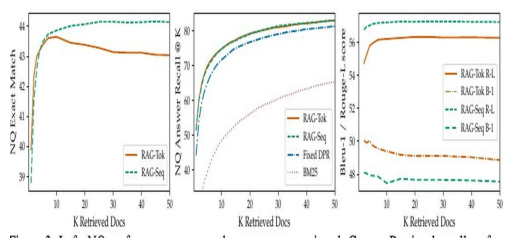

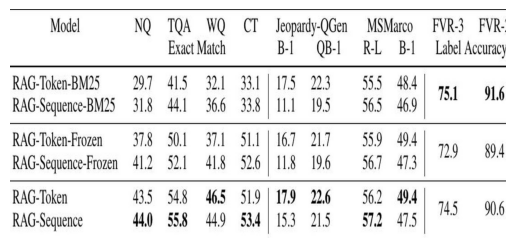

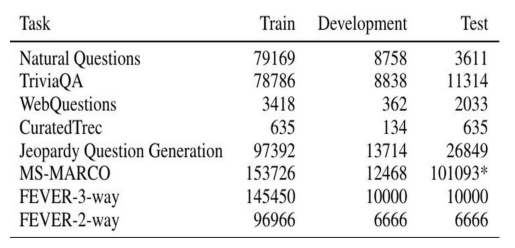

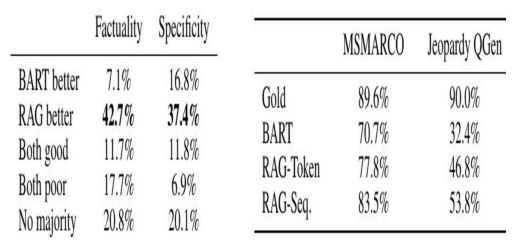

In [130]:
response = chain_multimodal_rag.invoke(query1)

In [131]:
response

'Here\'s an explanation of the provided figures, relating them to the question about Natural Questions (NQ) and MS-MARCO performance:\n\n**Figure (Left): NQ Exact Match**\n\nThis graph shows the performance of two models, RAG-Tok and RAG-Seq, on the Natural Questions dataset as a function of the number of retrieved documents (K).  "Exact Match" is a metric measuring the percentage of questions where the model\'s answer exactly matches the ground truth answer.\n\n* **X-axis:**  Number of retrieved documents (K). As K increases, more information is available to the models.\n* **Y-axis:** Percentage of Exact Matches.\n* **RAG-Tok:** This model\'s performance plateaus relatively quickly, indicating that additional retrieved documents beyond a certain point don\'t significantly improve accuracy.\n* **RAG-Seq:** This model shows a similar trend, although its performance might improve slightly more with more documents than RAG-Tok.\n\n**Figure (Center): NQ Answer Recall@K**\n\nThis graph disp

In [132]:
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"

=========== From split_image_text_types =============
=========== From img_prompt_func =============
{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKCcAmiigCL5lXAQ4B6eop4JwPlIrxbS

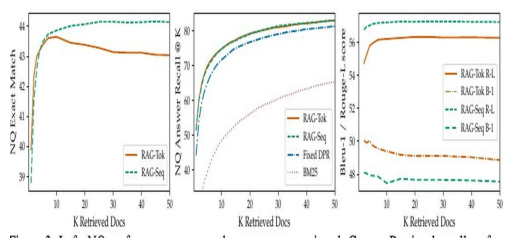

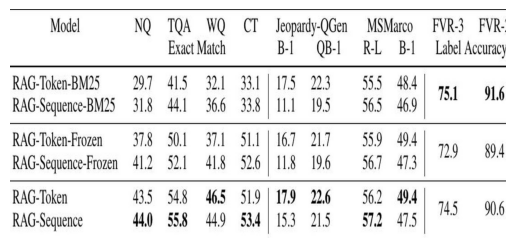

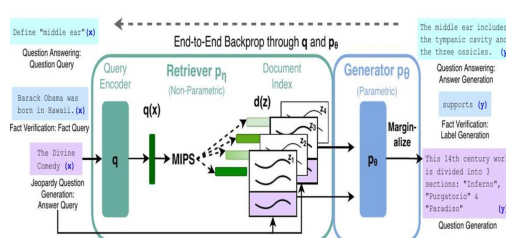

'The provided text explains that combining a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tuning end-to-end is done to leverage the strengths of both models.  The retriever efficiently finds relevant documents (top-K documents, *z<sub>i</sub>*), while the seq2seq model generates the final answer (*y*) by considering these retrieved documents as a latent variable.  The end-to-end fine-tuning allows the entire system to be optimized jointly, improving the overall performance compared to training each component separately.  In essence, the retriever focuses on efficient information retrieval, and the seq2seq model focuses on generating accurate and coherent answers based on the retrieved information.  The end-to-end training allows the system to learn optimal interactions between these two components.'

In [133]:
chain_multimodal_rag.invoke(query)